In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [133]:
df=pd.read_csv("used_cars.csv")
df.shape

(7846, 14)

In [134]:
df.head()

,Unnamed: 0,Name,Model,Brand,No_pre_owners,accident_history,Transmission,Engine,KM_used,Manufacture year,Insurance_type,Purchase_year,Insurance_valid_till,price
0,0,2009 Maruti Wagon R LXI MANUAL,Wagon,Maruti,1st Owner,Non-Accidental,MANUAL,Petrol,"46,807",2009,3rd Party,2009,2022,"1,50,999"
1,1,2016 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT M...,Grand,Hyundai,1st Owner,Non-Accidental,MANUAL,Petrol,"12,776",2016,Zero_Dep,2016,2022,"4,18,599"
2,2,2018 Maruti Alto 800 LXI MANUAL,Alto,Maruti,1st Owner,Non-Accidental,MANUAL,Petrol,727,2018,3rd Party,2018,2022,"3,36,199"
3,3,2013 Honda Amaze 1.2 SMT I VTEC MANUAL,Amaze,Honda,1st Owner,Non-Accidental,MANUAL,Petrol,"37,382",2013,Comp,2013,2022,"3,12,899"
4,4,2017 Hyundai Grand i10 MAGNA 1.2 VTVT MANUAL,Grand,Hyundai,1st Owner,Non-Accidental,MANUAL,Petrol,"20,561",2017,3rd Party,2017,2022,"4,12,899"


In [135]:
df.isnull().sum()

Unnamed: 0                0
Name                      0
Model                     0
Brand                     0
No_pre_owners             0
accident_history          0
Transmission            283
Engine                    0
KM_used                   0
Manufacture year          0
Insurance_type            8
Purchase_year             0
Insurance_valid_till      0
price                     0
dtype: int64

In [136]:
df["Transmission"].value_counts()

MANUAL       6915
AUTOMATIC     648
Name: Transmission, dtype: int64

In [137]:
df["Transmission"].unique()

array(['MANUAL', 'AUTOMATIC', nan], dtype=object)

In [138]:
#There is null value in the transmission column only

In [139]:
df["Name"].unique()

array(['2009 Maruti Wagon R LXI MANUAL',
       '2016 Hyundai Grand i10 SPORTZ 1.2 KAPPA VTVT MANUAL',
       '2018 Maruti Alto 800 LXI MANUAL', ...,
       '2021 Hyundai Creta SX PETROL MT MANUAL',
       '2020 Maruti Ertiga VXI CNG MANUAL',
       '2011 Hyundai Santro Xing GLS MANUAL'], dtype=object)

In [140]:
df["Name"].value_counts()

2013 Maruti Swift VDI MANUAL                               127
2015 Maruti Swift VDI ABS MANUAL                           121
2012 Maruti Swift Dzire VDI BS IV MANUAL                    97
2012 Maruti Swift VDI MANUAL                                88
2018 Maruti Alto 800 LXI MANUAL                             70
                                                          ... 
2015 Landrover Range Rover Evoque DYNAMIC SD4 AUTOMATIC      1
2016 Volkswagen Polo TRENDLINE 1.2L PETROL MANUAL            1
2012 Skoda Fabia 1.2 MPI ACTIVE PLUS MANUAL                  1
2009 Hyundai Santro Xing GLS MANUAL                          1
2018 Maruti Swift VDI AMT AUTOMATIC                          1
Name: Name, Length: 1564, dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            7846 non-null   int64 
 1   Name                  7846 non-null   object
 2   Model                 7846 non-null   object
 3   Brand                 7846 non-null   object
 4   No_pre_owners         7846 non-null   object
 5   accident_history      7846 non-null   object
 6   Transmission          7563 non-null   object
 7   Engine                7846 non-null   object
 8   KM_used               7846 non-null   object
 9   Manufacture year      7846 non-null   int64 
 10  Insurance_type        7838 non-null   object
 11  Purchase_year         7846 non-null   object
 12  Insurance_valid_till  7846 non-null   object
 13  price                 7846 non-null   object
dtypes: int64(2), object(12)
memory usage: 858.3+ KB


In [142]:
df.drop("Name",axis=1,inplace=True)

In [143]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [144]:
#Deleted the column Name and unnamed as unnmed has only serial numbers and name column is information is already availabe in the different columns.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Model                 7846 non-null   object
 1   Brand                 7846 non-null   object
 2   No_pre_owners         7846 non-null   object
 3   accident_history      7846 non-null   object
 4   Transmission          7563 non-null   object
 5   Engine                7846 non-null   object
 6   KM_used               7846 non-null   object
 7   Manufacture year      7846 non-null   int64 
 8   Insurance_type        7838 non-null   object
 9   Purchase_year         7846 non-null   object
 10  Insurance_valid_till  7846 non-null   object
 11  price                 7846 non-null   object
dtypes: int64(1), object(11)
memory usage: 735.7+ KB


In [146]:
#Applying label encoding and changing all the data type from object to int

In [147]:
df["Model"].unique()

array(['Wagon', 'Grand', 'Alto', 'Amaze', 'Swift', 'Baleno', 'Eon',
       'Eeco', 'Dzire', 'Ciaz', 'Nano', 'Kwid', 'Ritz', 'Zen', 'Jazz',
       'Etios', 'Verna', 'Celerio', 'A', 'Vento', 'i20', 'IGNIS', 'i10',
       'GRAND', 'New', 'Beat', 'XL6', 'S', 'City', 'Santro', 'Redi',
       'HECTOR', 'Ameo', 'Tiago', 'Vitara', 'Elite', 'Mobilio', 'Brio',
       'XUV', 'NEW', 'TUV300', 'Polo', 'Figo', 'Ertiga', 'Ecosport',
       'Glanza', 'VENUE', 'Spark', 'Zest', 'SONET', 'YARIS', 'Duster',
       'Fiesta', 'CRV', 'Creta', 'Bolero', 'Terrano', 'XUV500', 'Innova',
       'TRIBER', 'S60', 'Accord', 'Sunny', 'Aveo', 'X1', 'Rapid', 'WR-V',
       'Superb', 'SELTOS', 'Fortuner', 'Scorpio', 'Tucson', 'Sail',
       'Corolla', 'FREESTYLE', 'SX4', 'TIGOR', 'Benz', 'Linea', 'Jetta',
       'Compass', 'Pulse', 'Scala', 'A3', 'Civic', 'Punto', 'Q3', 'Go',
       'Xenon', 'A4', 'BR-V', 'Thar', 'Cruze', 'Xylo', '3', 'Endeavour',
       'XC', 'Harrier', 'A6', 'Quanto', 'NEXON', '5', 'Freelander', 'KUV'

In [148]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Model"]=LE.fit_transform(df["Model"])

In [149]:
df["Model"].unique()

array([111,  46,   7,   8,  96,  12,  33,  30,  28,  20,  69,  58,  82,
       125,  52,  35, 108,  19,   2, 107, 128,  50, 127,  43,  70,  13,
       117,  83,  21,  90,  80,  47,   9, 104, 109,  31,  66,  16, 118,
        67, 101,  73,  39,  34,  29,  44, 106,  93, 126,  86, 123,  27,
        38,  17,  25,  15, 102, 119,  51,  99,  84,   6,  94,  10, 112,
        79, 110,  95,  85,  41,  92, 105,  89,  24,  36,  87,  98,  14,
        59,  53,  23,  74,  91,   3,  22,  75,  76,  45, 121,   4,  11,
       103,  26, 122,   0,  32, 114,  48,   5,  77,  68,   1,  42,  55,
       120,  88, 113,  18,  57, 115,  64,  97,  49,  65, 124,  40, 100,
        81, 116,  61,  56,  63,  62,  72,  37,  71,  60,  78,  54])

In [150]:
LE=LabelEncoder()
df["Brand"]=LE.fit_transform(df["Brand"])

In [151]:
df["Brand"].unique()

array([16,  8,  7, 23, 20, 24, 25,  2,  3, 14, 15,  6,  5, 12, 19, 26,  1,
       21, 17,  4, 11,  0, 13, 22, 10,  9, 18])

In [152]:
df["No_pre_owners"].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner'], dtype=object)

In [153]:
LE=LabelEncoder()
df["No_pre_owners"]=LE.fit_transform(df["No_pre_owners"])

In [154]:
df["No_pre_owners"].unique()

array([0, 1, 2, 3])

In [155]:
df["accident_history"].unique()

array(['Non-Accidental', 'HistoryNon-Accidental'], dtype=object)

In [156]:
LE=LabelEncoder()
df["accident_history"]=LE.fit_transform(df["accident_history"])

In [157]:
df["Engine"].unique()

array(['Petrol', 'Diesel', 'Petrol + CNG', 'Fuel TypeDiesel',
       'Fuel TypePetrol', 'Petrol + LPG'], dtype=object)

In [158]:
LE=LabelEncoder()
df["Engine"]=LE.fit_transform(df["Engine"])

In [159]:
df["KM_used"].unique()

array(['46,807 ', '12,776 ', '727 ', ..., '76,773 ', '58,862 ', '81,906 '],
      dtype=object)

In [160]:
df["Insurance_type"].unique()

array(['3rd Party', 'Zero_Dep', 'Comp', nan], dtype=object)

In [161]:
df["Insurance_type"].mode()

0    3rd Party
dtype: object

In [162]:
df['Insurance_type'] = df['Insurance_type'].replace(np.nan,'3rd Party')

In [163]:
df["Insurance_type"].unique()

array(['3rd Party', 'Zero_Dep', 'Comp'], dtype=object)

In [164]:
LE=LabelEncoder()
df["Insurance_type"]=LE.fit_transform(df["Insurance_type"])

In [165]:
df["Insurance_type"].unique()

array([0, 2, 1])

In [166]:
df["Purchase_year"].mode()

0    2015
dtype: object

In [167]:
df["Purchase_year"].replace({'of': '2015'}, inplace=True)

In [168]:
#removed the categorical value with the mode

In [169]:
df["Purchase_year"].unique()

array(['2009', '2016', '2018', '2013', '2017', '2020', '2015', '2014',
       '2019', '2012', '2010', '2011', '2021', '2008', '2007'],
      dtype=object)

In [170]:
LE=LabelEncoder()
df["Purchase_year"]=LE.fit_transform(df["Purchase_year"])

In [171]:
df["Purchase_year"].unique()

array([ 2,  9, 11,  6, 10, 13,  8,  7, 12,  5,  3,  4, 14,  1,  0])

In [172]:
df["Insurance_valid_till"].unique()

array(['2022', '2021', '2023', '2024', '2025', 'Sep', 'Jun', 'Mar', 'May',
       'Jan', 'Feb', 'Apr'], dtype=object)

In [173]:
df["Insurance_valid_till"].replace(['Sep', 'Jun', 'Mar', 'May', 'Jan', 'Feb', 'Apr'],'2021', inplace=True)

In [174]:
df["Insurance_valid_till"].unique()

array(['2022', '2021', '2023', '2024', '2025'], dtype=object)

In [175]:
#replaced the months with curret year

In [176]:
LE=LabelEncoder()
df["Insurance_valid_till"]=LE.fit_transform(df["Insurance_valid_till"])

In [177]:
df["price"].unique()

array(['1,50,999', '4,18,599', '3,36,199', ..., '7,34,899', '3,77,099',
       '9,94,799'], dtype=object)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Model                 7846 non-null   int32 
 1   Brand                 7846 non-null   int32 
 2   No_pre_owners         7846 non-null   int32 
 3   accident_history      7846 non-null   int32 
 4   Transmission          7563 non-null   object
 5   Engine                7846 non-null   int32 
 6   KM_used               7846 non-null   object
 7   Manufacture year      7846 non-null   int64 
 8   Insurance_type        7846 non-null   int32 
 9   Purchase_year         7846 non-null   int32 
 10  Insurance_valid_till  7846 non-null   int32 
 11  price                 7846 non-null   object
dtypes: int32(8), int64(1), object(3)
memory usage: 490.5+ KB


In [179]:
df["Transmission"].unique()

array(['MANUAL', 'AUTOMATIC', nan], dtype=object)

In [180]:
df["Transmission"].mode()

0    MANUAL
dtype: object

In [181]:
df['Transmission'] = df['Transmission'].replace(np.nan,'MANUAL')

In [182]:
df["Transmission"].unique()

array(['MANUAL', 'AUTOMATIC'], dtype=object)

In [183]:
LE=LabelEncoder()
df["Transmission"]=LE.fit_transform(df["Transmission"])

In [184]:
df["Transmission"].unique()

array([1, 0])

In [185]:
df["KM_used"].unique()

array(['46,807 ', '12,776 ', '727 ', ..., '76,773 ', '58,862 ', '81,906 '],
      dtype=object)

In [186]:
df["KM_used"]= df["KM_used"].replace(',','')

In [187]:
df.replace({'Driven_km':{'[A-za-z]',',','-'}},'',regex = True,inplace = True)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Model                 7846 non-null   int32 
 1   Brand                 7846 non-null   int32 
 2   No_pre_owners         7846 non-null   int32 
 3   accident_history      7846 non-null   int32 
 4   Transmission          7846 non-null   int32 
 5   Engine                7846 non-null   int32 
 6   KM_used               7846 non-null   object
 7   Manufacture year      7846 non-null   int64 
 8   Insurance_type        7846 non-null   int32 
 9   Purchase_year         7846 non-null   int32 
 10  Insurance_valid_till  7846 non-null   int32 
 11  price                 7846 non-null   object
dtypes: int32(9), int64(1), object(2)
memory usage: 459.9+ KB


In [189]:
df["price"] = df["price"].str.replace(",","").astype(float)

In [190]:
pd.set_option('display.max_columns', None)
df

,Model,Brand,No_pre_owners,accident_history,Transmission,Engine,KM_used,Manufacture year,Insurance_type,Purchase_year,Insurance_valid_till,price
0,111,16,0,1,1,3,"46,807",2009,0,2,1,150999.0
1,46,8,0,1,1,3,"12,776",2016,2,9,1,418599.0
2,7,16,0,1,1,3,727,2018,0,11,1,336199.0
3,8,7,0,1,1,3,"37,382",2013,1,6,1,312899.0
4,46,8,0,1,1,3,"20,561",2017,0,10,1,412899.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7841,57,15,0,1,1,0,"90,509",2016,0,9,1,386199.0
7842,81,22,1,1,1,0,"1,08,958",2014,0,7,1,664699.0
7843,31,8,0,1,1,0,"1,29,194",2016,0,9,1,572499.0
7844,108,8,2,1,1,0,"1,86,575",2014,0,7,1,363299.0


In [191]:
#df_new = df[df['KM_used'] == 'Kilometers Driven75881 ']
  
print(df_new)

Empty DataFrame
Columns: [Model, Brand, No_pre_owners, accident_history, Transmission, Engine, KM_used, Manufacture year, Insurance_type, Purchase_year, Insurance_valid_till, price]
Index: []


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 7846 non-null   int32  
 1   Brand                 7846 non-null   int32  
 2   No_pre_owners         7846 non-null   int32  
 3   accident_history      7846 non-null   int32  
 4   Transmission          7846 non-null   int32  
 5   Engine                7846 non-null   int32  
 6   KM_used               7846 non-null   object 
 7   Manufacture year      7846 non-null   int64  
 8   Insurance_type        7846 non-null   int32  
 9   Purchase_year         7846 non-null   int32  
 10  Insurance_valid_till  7846 non-null   int32  
 11  price                 7846 non-null   float64
dtypes: float64(1), int32(9), int64(1), object(1)
memory usage: 459.9+ KB


In [193]:
#df["KM_used"] = df["KM_used"].str.replace(",","").astype(float)

In [194]:
df["KM_used"].value_counts

<bound method IndexOpsMixin.value_counts of 0         46,807 
1         12,776 
2            727 
3         37,382 
4         20,561 
          ...    
7841      90,509 
7842    1,08,958 
7843    1,29,194 
7844    1,86,575 
7845    1,40,976 
Name: KM_used, Length: 7846, dtype: object>

In [195]:
df["KM_used"].value_counts()

84,757                      6
73,411                      6
51,346                      6
42,344                      6
70,325                      6
                           ..
34,395                      1
10,177                      1
727                         1
94,104                      1
Kilometers Driven16,026     1
Name: KM_used, Length: 3979, dtype: int64

In [196]:
#df['KM_used1']=df['KM_used'].str.extract('([A-Za-z]+)?([0-9]*[.]?[0-9]+)')

In [197]:
df['KM_used'].isnull().sum()

0

In [198]:
#df["KM_used"] = df["KM_used"].str.replace(",","").astype(float)

ValueError: could not convert string to float: 'Kilometers Driven75881 '

In [199]:
df.replace({'Kilometers Driven':{'[A-za-z]',',','-'}},'',regex = True,inplace = True)

In [203]:
df['KM_used'] = df['KM_used'].str.replace(r'[^\d.]+', '')

In [201]:
df.replace({'Kilometers Driven':{'[A-za-z]',',','-'}},'',regex = True,inplace = True)

In [204]:
df["KM_used"] = df["KM_used"].str.replace(",","").astype(float)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 7846 non-null   int32  
 1   Brand                 7846 non-null   int32  
 2   No_pre_owners         7846 non-null   int32  
 3   accident_history      7846 non-null   int32  
 4   Transmission          7846 non-null   int32  
 5   Engine                7846 non-null   int32  
 6   KM_used               7846 non-null   float64
 7   Manufacture year      7846 non-null   int64  
 8   Insurance_type        7846 non-null   int32  
 9   Purchase_year         7846 non-null   int32  
 10  Insurance_valid_till  7846 non-null   int32  
 11  price                 7846 non-null   float64
dtypes: float64(2), int32(9), int64(1)
memory usage: 459.9 KB


In [207]:
df.isnull().sum()

Model                   0
Brand                   0
No_pre_owners           0
accident_history        0
Transmission            0
Engine                  0
KM_used                 0
Manufacture year        0
Insurance_type          0
Purchase_year           0
Insurance_valid_till    0
price                   0
dtype: int64

In [208]:
#There is no null values

In [209]:
df["KM_used"].value_counts()

70325.0    6
56811.0    6
73411.0    6
81239.0    6
51346.0    6
          ..
17212.0    1
47583.0    1
16969.0    1
64909.0    1
1584.0     1
Name: KM_used, Length: 3829, dtype: int64

In [210]:
df.describe()

,Model,Brand,No_pre_owners,accident_history,Transmission,Engine,KM_used,Manufacture year,Insurance_type,Purchase_year,Insurance_valid_till,price
count,7846.000000,7846.000000,7846.000000,7846.000000,7846.000000,7846.000000,7846.000000,7846.000000,7846.000000,7846.000000,7846.000000,7.846000e+03
mean,60.356487,13.836732,0.244711,0.978078,0.917410,1.813918,61136.627963,2015.072394,0.262682,8.089090,0.986745,4.895596e+05
std,40.331008,5.411362,0.504935,0.146438,0.275279,1.493573,39420.596214,2.839602,0.584658,2.819687,0.201531,3.219719e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.000000,2007.000000,0.000000,0.000000,0.000000,6.600000e+04
25%,24.000000,8.000000,0.000000,1.000000,1.000000,0.000000,31933.500000,2013.000000,0.000000,6.000000,1.000000,3.019992e+05
50%,51.000000,16.000000,0.000000,1.000000,1.000000,3.000000,56793.000000,2015.000000,0.000000,8.000000,1.000000,4.080000e+05
75%,96.000000,16.000000,0.000000,1.000000,1.000000,3.000000,82902.750000,2017.000000,0.000000,10.000000,1.000000,5.779740e+05
max,128.000000,26.000000,3.000000,1.000000,1.000000,5.000000,578889.000000,2021.000000,2.000000,14.000000,4.000000,6.500000e+06


In [211]:
df.skew()

Model                   0.112177
Brand                  -0.100773
No_pre_owners           2.086426
accident_history       -6.531080
Transmission           -3.033409
Engine                 -0.331478
KM_used                 1.571500
Manufacture year       -0.273625
Insurance_type          2.099976
Purchase_year          -0.284933
Insurance_valid_till    0.073033
price                   4.222998
dtype: float64

In [212]:
df.corr()

,Model,Brand,No_pre_owners,accident_history,Transmission,Engine,KM_used,Manufacture year,Insurance_type,Purchase_year,Insurance_valid_till,price
Model,1.000000,0.078907,0.006150,-0.007763,0.068257,-0.215742,0.153650,-0.163472,-0.071453,-0.164445,-0.030643,-0.032312
Brand,0.078907,1.000000,-0.050688,-0.013365,0.062228,-0.091228,0.061736,0.040911,0.007594,0.046191,-0.020686,-0.045607
No_pre_owners,0.006150,-0.050688,1.000000,0.007051,-0.071006,0.017287,0.104748,-0.217722,-0.077872,-0.218549,-0.009458,-0.047185
accident_history,-0.007763,-0.013365,0.007051,1.000000,-0.000650,0.051866,-0.102869,0.043974,0.012181,0.004731,0.733069,-0.002421
Transmission,0.068257,0.062228,-0.071006,-0.000650,1.000000,-0.020332,0.044854,-0.076821,-0.018044,-0.074766,-0.003652,-0.341382
Engine,-0.215742,-0.091228,0.017287,0.051866,-0.020332,1.000000,-0.387530,0.048741,0.061969,0.047704,0.062950,-0.252313
KM_used,0.153650,0.061736,0.104748,-0.102869,0.044854,-0.387530,1.000000,-0.500726,-0.132308,-0.495565,-0.137201,-0.139221
Manufacture year,-0.163472,0.040911,-0.217722,0.043974,-0.076821,0.048741,-0.500726,1.000000,0.224336,0.993173,0.131538,0.447875
Insurance_type,-0.071453,0.007594,-0.077872,0.012181,-0.018044,0.061969,-0.132308,0.224336,1.000000,0.223955,0.007918,0.101516
Purchase_year,-0.164445,0.046191,-0.218549,0.004731,-0.074766,0.047704,-0.495565,0.993173,0.223955,1.000000,0.103470,0.443346


<AxesSubplot:>

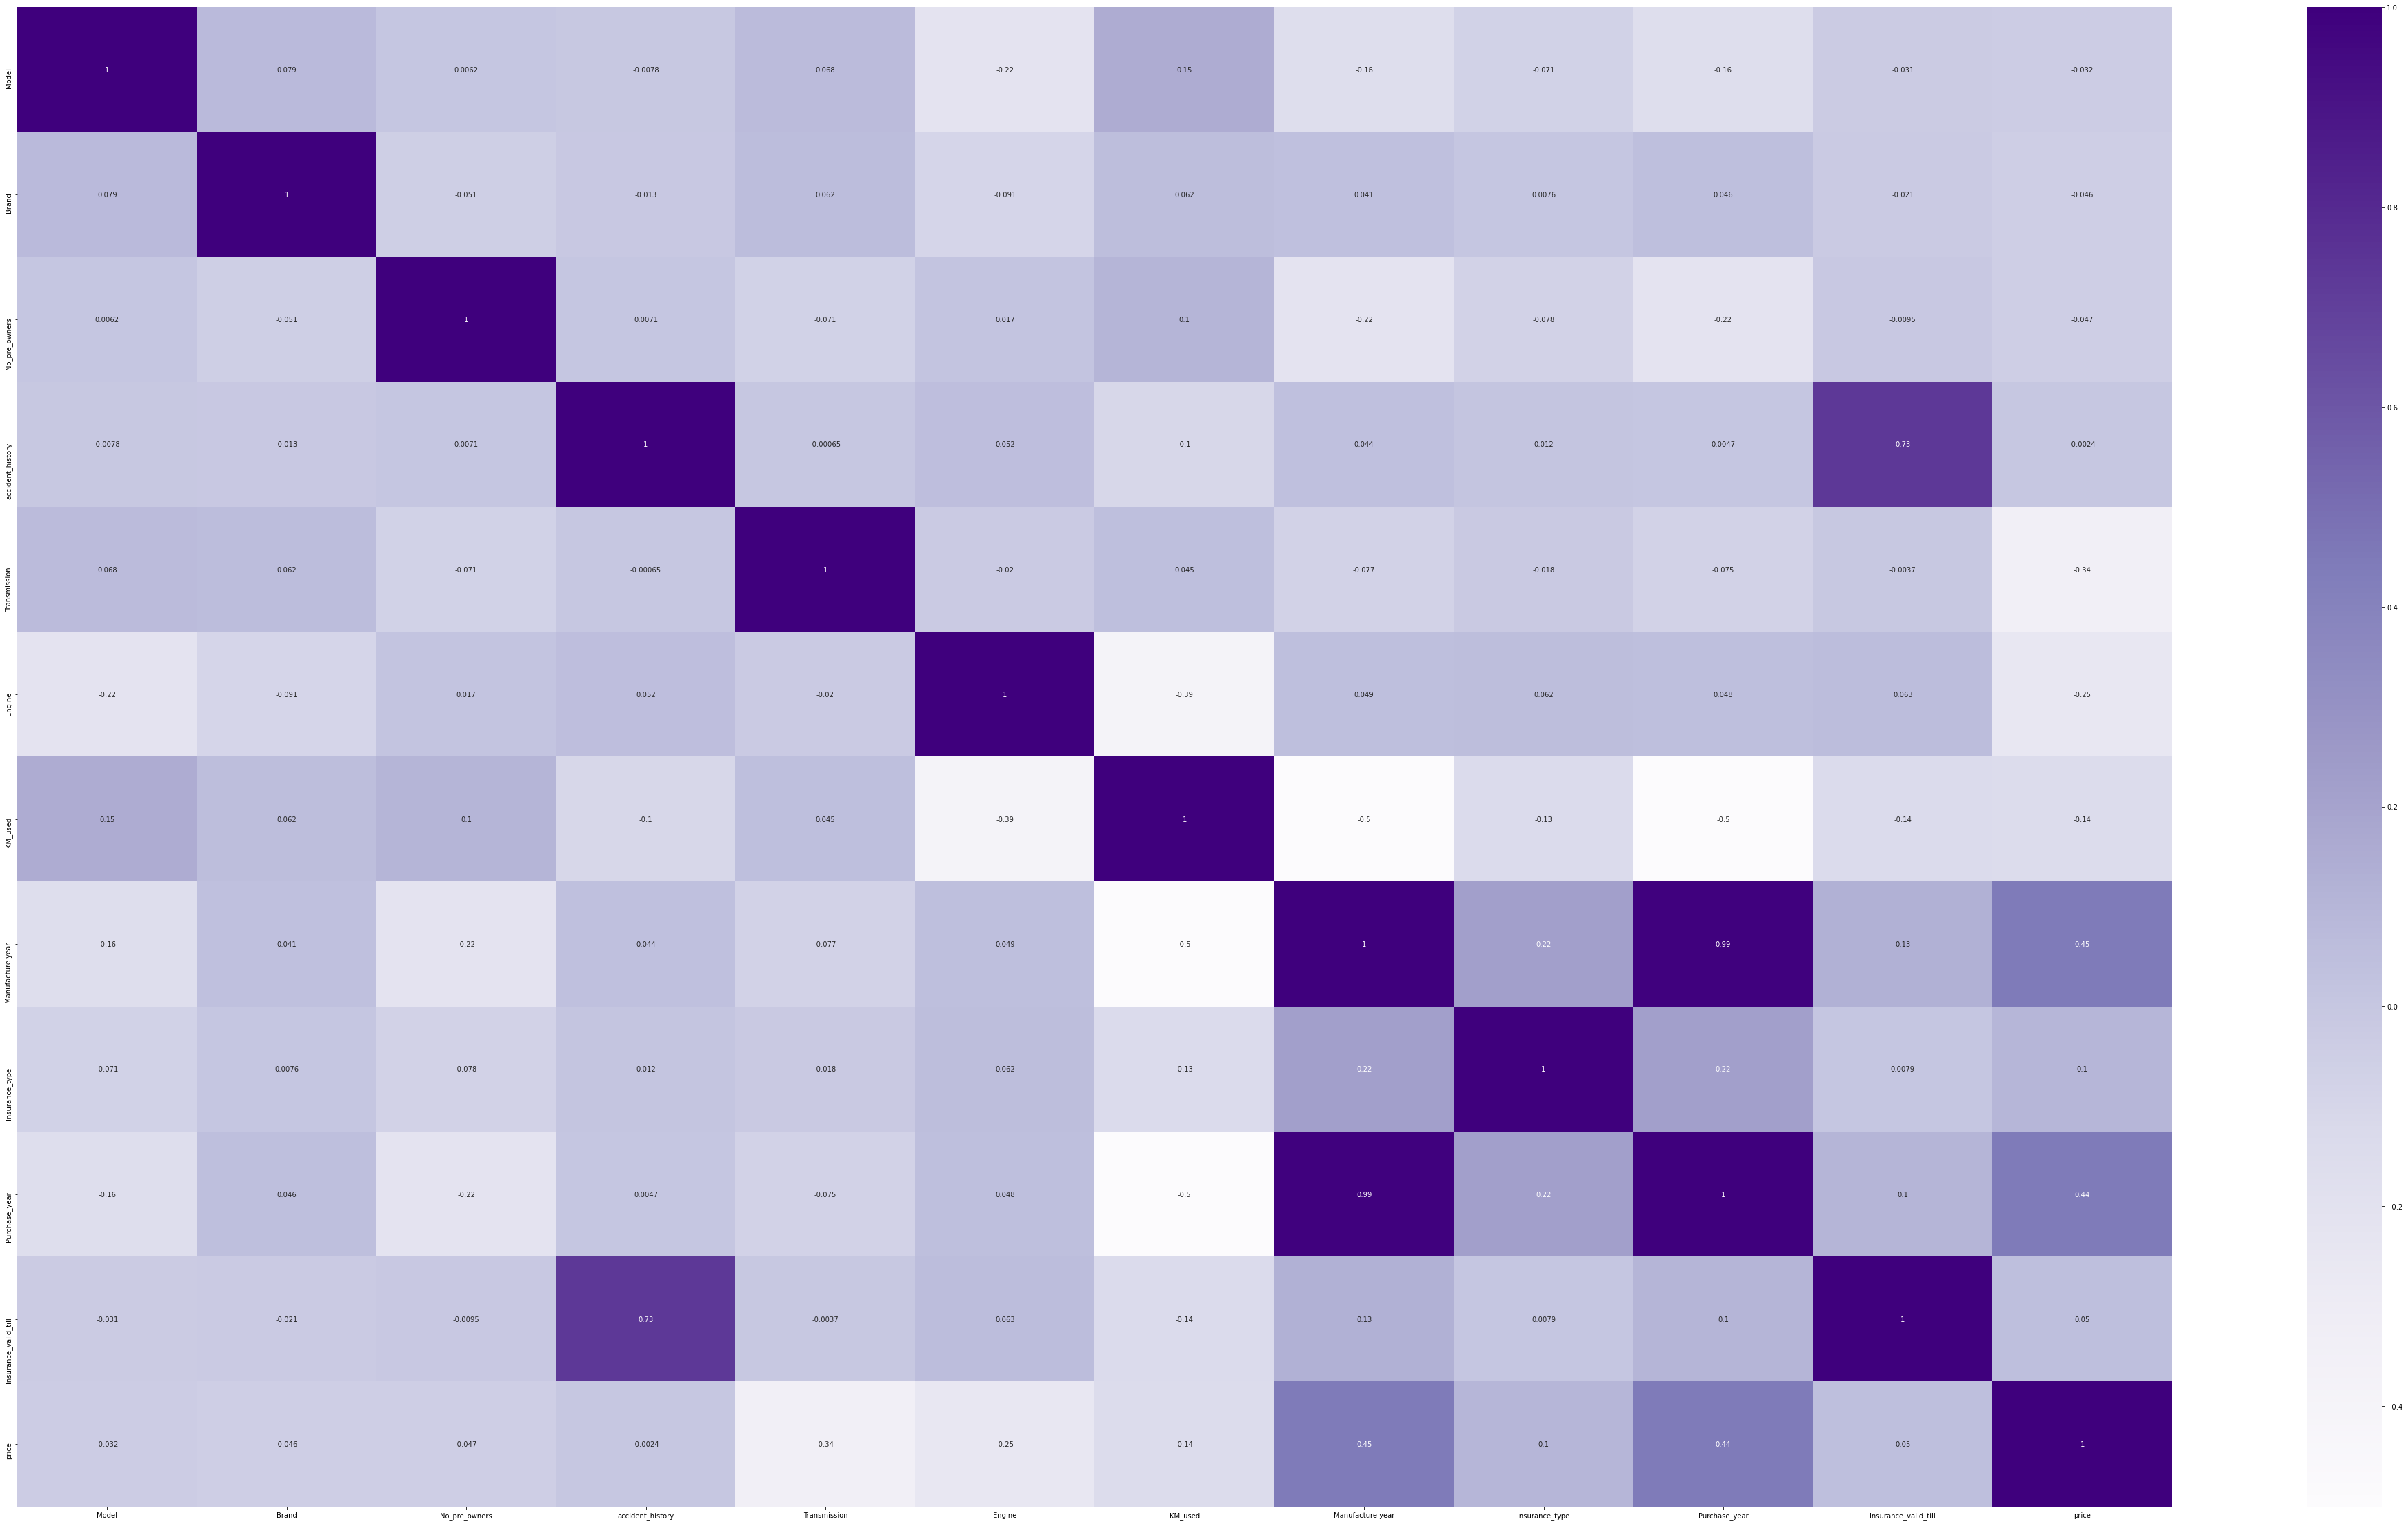

In [213]:
fig=plt.figure(figsize=(70,40))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Purples")

In [214]:
#removing outliers

In [215]:
df.columns

Index(['Model', 'Brand', 'No_pre_owners', 'accident_history', 'Transmission',
       'Engine', 'KM_used', 'Manufacture year', 'Insurance_type',
       'Purchase_year', 'Insurance_valid_till', 'price'],
      dtype='object')

In [216]:
from scipy.stats import zscore

In [217]:
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [218]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before         : (7846, 12)
shape after          : (6624, 12)
pecentage loss       : 0.15574815192454755


In [220]:
#removed outliers with zscore and there is 0.15% data loss now we will try with IQR also

In [221]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1

In [222]:
df_new1=df[~((df<(q1-1.5*IQR)) |(df>(q3+1.5*IQR))).any(axis=1)]

In [223]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new1.shape)
print("pecentage loss".ljust(20),":",(df.shape[0]-df_new1.shape[0])/df.shape[0])

shape before and after
shape before         : (7846, 12)
shape after          : (4212, 12)
pecentage loss       : 0.46316594443028297


In [225]:
#With IQR there is 46% data loss so we will go through the zscore

In [226]:
x=df.drop("price",axis=1)
y=df["price"]

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6276, 11)
(1570, 11)
(6276,)
(1570,)


In [228]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [229]:
y_pred = reg_rf.predict(X_test)

In [230]:
reg_rf.score(X_train, y_train)

0.9883416682495656

In [231]:
reg_rf.score(X_test, y_test)

0.9353141689471605

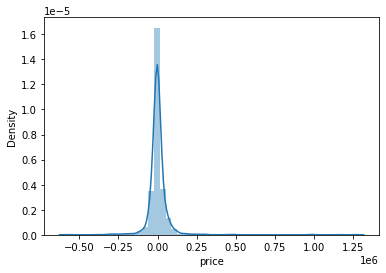

In [232]:
sns.distplot(y_test-y_pred)
plt.show()

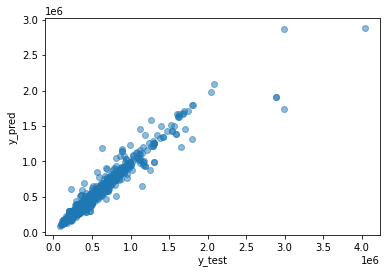

In [233]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [234]:
from sklearn import metrics

In [235]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 30721.919179809927
MSE: 6203744121.675418
RMSE: 78763.85034821126


In [237]:
metrics.r2_score(y_test, y_pred)

0.9353141689471605

In [238]:
#WE WILL GO THROUGH THE RANDOM FOREST REGRESSOR as there is 93% accuracy in the model performance